In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/aniruddha7599/DAIICT-/refs/heads/main/NAFLD%20EDA.csv'
data = pd.read_csv(url)

In [108]:
# Display basic information about the dataset
print(data.head())
print(data.info())

        Age  Height (cm)  Weight (kg)  Body Mass Index  \
0  1.287682    -1.492160    -0.448911         0.763847   
1  0.817640    -1.088605    -0.944812        -0.211064   
2  0.629623     0.525618     1.038792         0.639434   
3 -1.250545     1.030063     0.613734        -0.162115   
4 -2.190629    -0.281493    -1.299027        -1.204332   

   Waist Circumference (cm)  Hip Circumference (cm)  \
0                  0.969543               -0.026145   
1                 -0.844825               -0.618139   
2                  0.667148                0.763179   
3                  0.465552                0.960510   
4                 -0.844825               -0.716804   

   Gender (Female=0, Male=1)  Diabetes (No=0, Yes=1)  \
0                          0                       0   
1                          0                       0   
2                          1                       1   
3                          1                       1   
4                          1            

In [109]:
# Define input and output variables
X = data.drop(columns=["Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)"])
y = data["Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)"]

In [110]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [111]:
# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors as needed
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [112]:
# Make predictions
y_pred = knn.predict(X_test)

In [113]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)


Accuracy: 0.7253

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.48      0.53        58
           1       0.78      0.84      0.81       124

    accuracy                           0.73       182
   macro avg       0.68      0.66      0.67       182
weighted avg       0.71      0.73      0.72       182



In [114]:
# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(f"ROC-AUC Score: {roc_auc:.2f}")

Accuracy: 0.7253
Confusion Matrix:
[[ 28  30]
 [ 20 104]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.48      0.53        58
           1       0.78      0.84      0.81       124

    accuracy                           0.73       182
   macro avg       0.68      0.66      0.67       182
weighted avg       0.71      0.73      0.72       182

ROC-AUC Score: 0.66


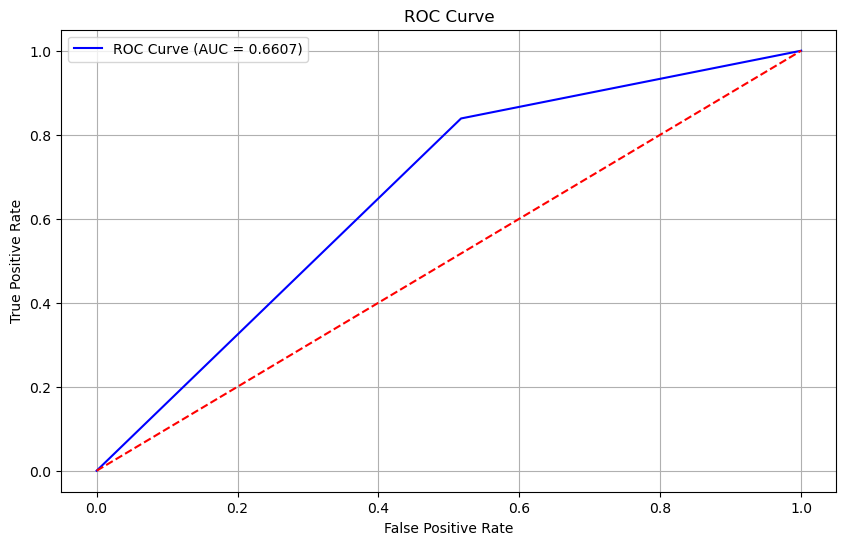

In [115]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

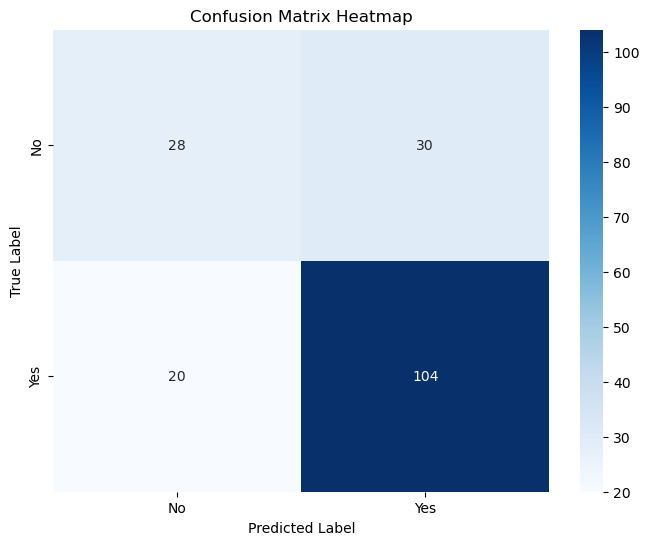

In [116]:
# Plot the heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()